In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Its alive!")

Its alive!


In [13]:
#Functions


In [14]:
drop_list = []
df = pd.read_csv("./Utah_Crash_Data_2020.csv")
df = df.drop([
"CRASH_ID",
"CRASH_DATETIME",
# "CRASH_SEVERITY_ID",
"ROUTE",
"MILEPOINT",
"LAT_UTM_Y",
"LONG_UTM_X",
"MAIN_ROAD_NAME",  
# "CITY",                              
"COUNTY_NAME",                       
# "WORK_ZONE_RELATED",                 
# "PEDESTRIAN_INVOLVED",               
# "BICYCLIST_INVOLVED",                
# "MOTORCYCLE_INVOLVED",               
# "IMPROPER_RESTRAINT",                
# "UNRESTRAINED",                      
# "DUI",                               
# "INTERSECTION_RELATED",              
# "WILD_ANIMAL_RELATED",               
# "DOMESTIC_ANIMAL_RELATED",           
# "OVERTURN_ROLLOVER",                 
# "COMMERCIAL_MOTOR_VEH_INVOLVED",     
# "TEENAGE_DRIVER_INVOLVED",           
# "OLDER_DRIVER_INVOLVED",             
# "NIGHT_DARK_CONDITION",              
# "SINGLE_VEHICLE",                    
# "DISTRACTED_DRIVING",                
# "DROWSY_DRIVING",                   
# "ROADWAY_DEPARTURE"
], axis=1)

df = df.dropna()

C:\Users\whyri\AppData\Local\Temp\ipykernel_35092\2162138561.py:2: DtypeWarning: Columns (0,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Utah_Crash_Data_2020.csv")


In [15]:
for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]) and col != 'CRASH_SEVERITY_ID':
        df = pd.get_dummies(df, columns=[col])

df.head()

,CRASH_SEVERITY_ID,CITY_*** ERROR ***,CITY_ABRAHAM,CITY_ADAMSVILLE,CITY_ALPINE,CITY_ALTA,CITY_ALTAMONT,CITY_AMALGA,CITY_AMERICAN FORK,CITY_ANETH,...,NIGHT_DARK_CONDITION_False,NIGHT_DARK_CONDITION_True,SINGLE_VEHICLE_False,SINGLE_VEHICLE_True,DISTRACTED_DRIVING_False,DISTRACTED_DRIVING_True,DROWSY_DRIVING_False,DROWSY_DRIVING_True,ROADWAY_DEPARTURE_False,ROADWAY_DEPARTURE_True
0,2.0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
1,1.0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,3.0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [16]:
y = df['CRASH_SEVERITY_ID'] # Label
X = df.drop(columns=['CRASH_SEVERITY_ID']) # Features
X.head()

,CITY_*** ERROR ***,CITY_ABRAHAM,CITY_ADAMSVILLE,CITY_ALPINE,CITY_ALTA,CITY_ALTAMONT,CITY_AMALGA,CITY_AMERICAN FORK,CITY_ANETH,CITY_ANGLE,...,NIGHT_DARK_CONDITION_False,NIGHT_DARK_CONDITION_True,SINGLE_VEHICLE_False,SINGLE_VEHICLE_True,DISTRACTED_DRIVING_False,DISTRACTED_DRIVING_True,DROWSY_DRIVING_False,DROWSY_DRIVING_True,ROADWAY_DEPARTURE_False,ROADWAY_DEPARTURE_True
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [18]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

# Predict the labels for test dataset
y_pred = clf.predict(X_test)

In [19]:
# View the predicted versus actual in a DataFrame

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df.head(10)

,Actual,Predicted
187035,1.0,1.0
52751,1.0,1.0
225936,2.0,1.0
177320,1.0,1.0
212750,1.0,1.0
93709,1.0,1.0
248748,1.0,1.0
204406,2.0,1.0
121351,1.0,1.0
118917,3.0,4.0


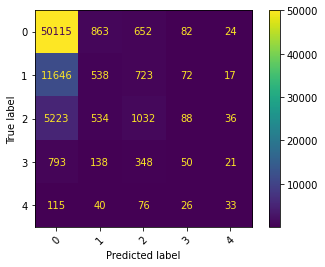

In [21]:
# Import scikit-learn metrics module. See complete list of Classification metrics here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn import metrics

from matplotlib import pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot(values_format='d')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Classification Report
df_report = pd.DataFrame(metrics.classification_report(y_test_dummies, y_pred_dummies, output_dict=True))
df_report

0.8852834822951491